In [1]:
from datetime import date
import pandas as pd
import os
import glob
import seaborn as sns

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

# Load data

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/QC_Viz/"

In [4]:
# load filtered data as individual batches
# data_U2OS = pd.read_csv(input_path + "2023-04-11_Bioactives_U2OS_norm_reduced_filtered.csv")
file_U2OS_type = '/*[0-9]_' + 'FMP_U2OS_norm_reduced_filtered.csv'
files_U2OS = glob.glob(input_path + file_U2OS_type)

### gets latest file
max_file_U2OS = max(files_U2OS, key=os.path.getctime)

### load file
FMP_U2OS = pd.read_csv(max_file_U2OS)
FMP_U2OS.shape

(5393, 745)

In [5]:
# data_HepG2 = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_norm_reduced_filtered.csv")
file_HepG2_type = '/*[0-9]_' + 'FMP_HepG2_norm_reduced_filtered.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
FMP_HepG2 = pd.read_csv(max_file_HepG2)
FMP_HepG2.shape

(3259, 661)

In [6]:
IMTM_HepG2_name = '/*[0-9]_' + 'IMTM_HepG2_norm_reduced_filtered.csv'
IMTM_HepG2_file = glob.glob(input_path + IMTM_HepG2_name)

### gets latest file
IMTM_HepG2_file_max = max(IMTM_HepG2_file, key=os.path.getctime)

### load file
IMTM_HepG2 = pd.read_csv(IMTM_HepG2_file_max)
IMTM_HepG2.shape

(2451, 637)

In [7]:
MEDI_HepG2_name = '/*[0-9]_' + 'MEDINA_HepG2_norm_reduced_filtered.csv'
MEDI_HepG2_file = glob.glob(input_path + MEDI_HepG2_name)

### gets latest file
MEDI_HepG2_file_max = max(MEDI_HepG2_file, key=os.path.getctime)

### load file
MEDI_HepG2 = pd.read_csv(MEDI_HepG2_file_max)
MEDI_HepG2.shape

(3068, 582)

In [8]:
USC_HepG2_name = '/*[0-9]_' + 'USC_HepG2_norm_reduced_filtered.csv'
USC_HepG2_file = glob.glob(input_path + USC_HepG2_name)

### gets latest file
USC_HepG2_file_max = max(USC_HepG2_file, key=os.path.getctime)

### load file
USC_HepG2 = pd.read_csv(USC_HepG2_file_max)
USC_HepG2.shape

(2396, 634)

# UMAP

In [9]:
FMP_U2OS_UMAP_2D_Batch = UTIL.UMAP_proj(FMP_U2OS, dim = 2)
FMP_HepG2_UMAP_2D_Batch = UTIL.UMAP_proj(FMP_HepG2, dim = 2)
IMTM_HepG2_UMAP_2D_Batch = UTIL.UMAP_proj(IMTM_HepG2, dim = 2)
MEDI_HepG2_UMAP_2D_Batch = UTIL.UMAP_proj(MEDI_HepG2, dim = 2)
USC_HepG2_UMAP_2D_Batch = UTIL.UMAP_proj(USC_HepG2, dim = 2)

/home/schmiedc/miniconda3/envs/vspaint/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/schmiedc/miniconda3/envs/vspaint/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/schmiedc/miniconda3/envs/vspaint/lib/python3.9/site-packag

UMAP projection performed
UMAP projection performed
UMAP projection performed
UMAP projection performed
UMAP projection performed


# Plot QC Viz

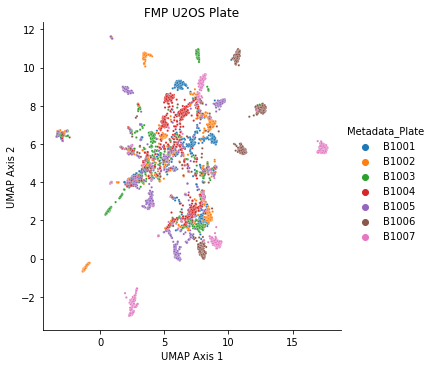

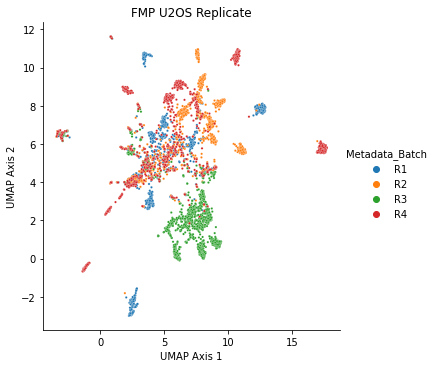

In [10]:
Data_Plot = FMP_U2OS_UMAP_2D_Batch

name = "FMP_U2OS"
plot_title = "FMP U2OS"

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Plate",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Plate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Plate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Batch",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Replicate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Replicate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

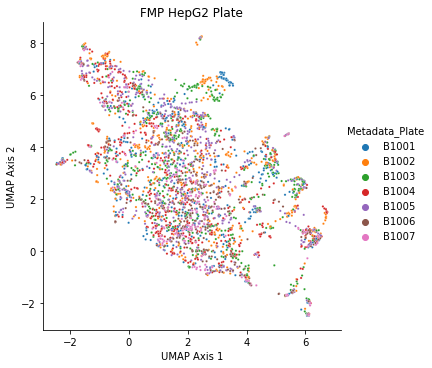

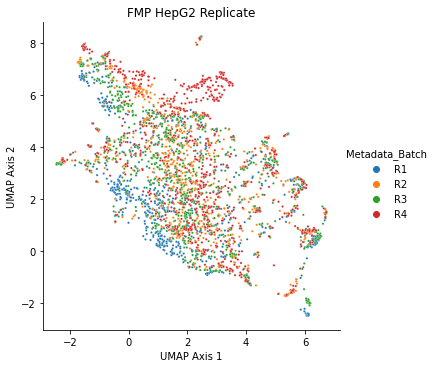

In [11]:
Data_Plot = FMP_HepG2_UMAP_2D_Batch

name = "FMP_HepG2"
plot_title = "FMP HepG2"

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Plate",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Plate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Plate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Batch",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Replicate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Replicate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

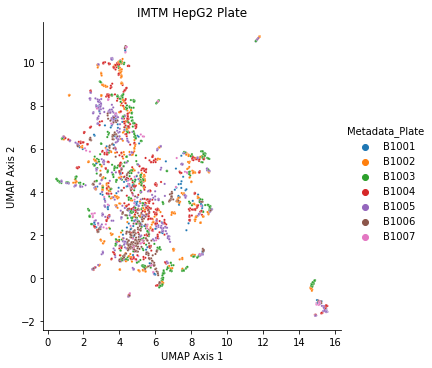

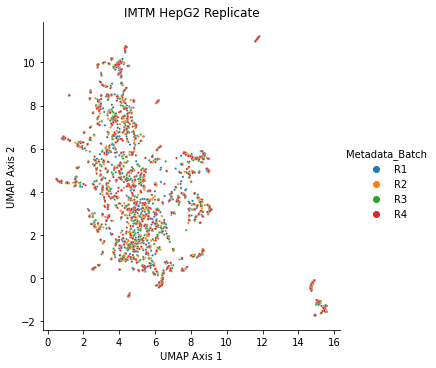

In [12]:
Data_Plot = IMTM_HepG2_UMAP_2D_Batch

name = "IMTM_HepG2"
plot_title = "IMTM HepG2"

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Plate",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Plate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Plate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Batch",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Replicate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Replicate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

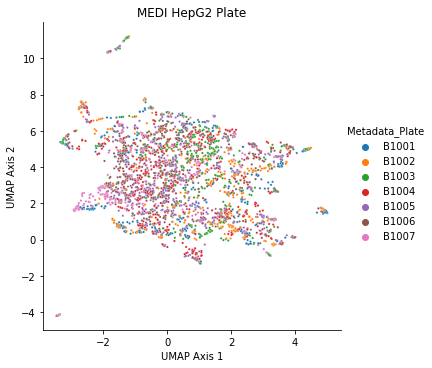

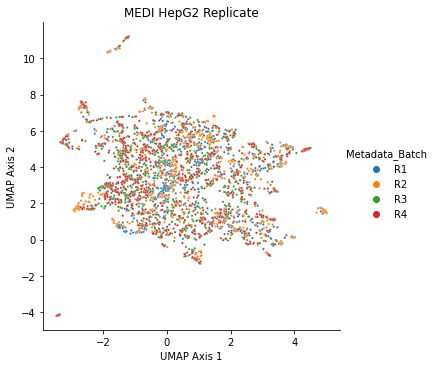

In [13]:
Data_Plot = MEDI_HepG2_UMAP_2D_Batch

name = "MEDI_HepG2"
plot_title = "MEDI HepG2"

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Plate",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Plate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Plate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Batch",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Replicate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Replicate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

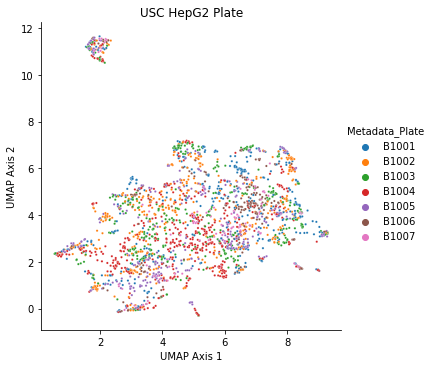

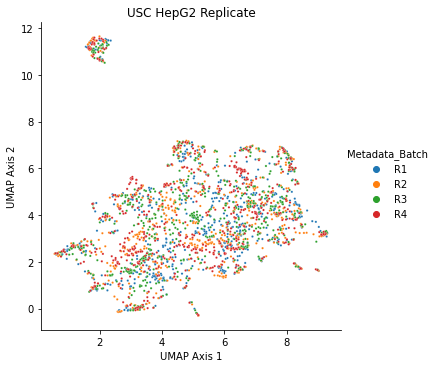

In [14]:
Data_Plot = USC_HepG2_UMAP_2D_Batch

name = "USC_HepG2"
plot_title = "USC HepG2"

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Plate",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Plate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Plate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)

p1 = sns.relplot(
    data = Data_Plot,
    x="Axis 1", y="Axis 2",
    #palette = color_dict,
    hue = "Metadata_Batch",
    #style = "Metadata_Batch",
    s = 5
)

p1.set(xlabel = "UMAP Axis 1", 
       ylabel = "UMAP Axis 2", 
       title = plot_title + " Replicate")

p1.figure.savefig(figure_path + str(date.today()) + '_' + name + '_UMAP_2D_Replicate.png', 
                  transparent=False, 
                  bbox_inches='tight', 
                  dpi = 600)